In [24]:
import xarray as xr
import os
import glob
import geopandas as gpd
import pandas as pd
import regionmask
import numpy as np
import re
from scipy.stats import linregress
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
from scipy.stats import linregress
from scipy.stats import pearsonr, spearmanr

In [6]:
path='/import/c1/DYNDOWN/phutton5/ROS/FNSB/FNSB_netcdf_files/ROS_Precip/'
pattern=f'ROS_P*.nc'
file_list = sorted(glob.glob(os.path.join(path, pattern)))
data1 = xr.open_mfdataset(file_list, combine='by_coords',engine='netcdf4')

start_year = '1950-1951'
data1 = data1.sel(season=data1.season >= start_year)
seasons=data1['season']
average_ROS_tally=np.nanmean(data1['ros_counts'],axis=(0))

rain_sum=data1['rain_sum']
rain_sum_avg=np.mean(rain_sum,axis=(0))
rain_ros_avg=data1['rain_ros_avg']
rain_ros_avg=np.mean(rain_ros_avg,axis=(0))
rain_ros_sum=data1['rain_ros_sum']
rain_ros_sum=np.mean(rain_ros_sum,axis=(0))

rain_sum_fnsb=[]
for i in range(len(data1['rain_sum'].season)):
    avg=data1['rain_sum'].isel(season=i).mean().compute().item()
    #avg = (avg - 273.15) * 9/5 + 32
    rain_sum_fnsb.append(avg)
print(rain_sum_fnsb)

rain_sum_ROS_fnsb=[]
for i in range(len(data1['rain_ros_sum'].season)):
    avg=data1['rain_ros_sum'].isel(season=i).mean().compute().item()
    rain_sum_ROS_fnsb.append(avg)
print(rain_sum_ROS_fnsb)

ros_avg_rain = np.mean(data1['rain_ros_avg'],axis=(0))

[0.011356600560247898, 0.02237807959318161, 0.020322280004620552, 0.01274876482784748, 0.03306262567639351, 0.0047749909572303295, 0.07649489492177963, 0.04012715071439743, 0.0044593820348382, 0.018588632345199585, 0.024269621819257736, 0.07754270732402802, 0.20528900623321533, 0.025813743472099304, 0.07243597507476807, 0.013078109361231327, 0.0199687872081995, 0.1815306693315506, 0.020694615319371223, 0.03461587429046631, 0.08063007146120071, 0.025618962943553925, 0.033112533390522, 0.005293040536344051, 0.012338658794760704, 0.035052042454481125, 0.08290060609579086, 0.013391224667429924, 0.029104024171829224, 0.10849703103303909, 0.03419908508658409, 0.04440384358167648, 0.02091294154524803, 0.021119657903909683, 0.04191945865750313, 0.058176688849925995, 0.06179330125451088, 0.011041778139770031, 0.05764307454228401, 0.0272569190710783, 0.06463170051574707, 0.013642125762999058, 0.033878885209560394, 0.042278941720724106, 0.01357797160744667, 0.014977913349866867, 0.010122573003172

In [7]:
ros_hourly_totals_climatology = []
for i in range(len(data1['ros_tally'].season)):
    val = data1['ros_tally'].isel(season=i).sum().compute().item()
    ros_hourly_totals_climatology.append(val)

n_pixels_per_season = []

for i in range(len(data1['ros_tally'].season)):
    # Get 2D field for the season
    ros_this_season = data1['ros_tally'].isel(season=i)
    
    # Create a boolean mask of where ROS occurred (value > 0)
    grid_with_ros = ros_this_season > 0
    
    # Count how many grid cells had ROS
    n_pixels = grid_with_ros.sum().compute().item()
    n_pixels_per_season.append(n_pixels)

ros_hours_normalized = [total / n if n > 0 else np.nan 
                        for total, n in zip(ros_hourly_totals_climatology, n_pixels_per_season)]

In [8]:
path='/center1/DYNDOWN/phutton5/ROS/FNSB/FNSB_netcdf_files/ROS_Tlevels/'
pattern=f'ROS_Tl*.nc'
file_list = sorted(glob.glob(os.path.join(path, pattern)))
data = xr.open_mfdataset(file_list, combine='by_coords',engine='netcdf4')
seasons=data['season']

start_year = '1950-1951'
data = data.sel(season=data.season >= start_year)
T2_ros_avg=data['T2_ros_avg']
T2_ros_avg=np.mean(T2_ros_avg,axis=(0))
T2_avg=data['T2_avg']
T2_avg=np.mean(data['T2_avg'],axis=(0))

T2_avg_fnsb=[]
for i in range(len(data['T2_avg'].season)):
    avg=data['T2_avg'].isel(season=i).mean().compute().item()
    #avg = (avg - 273.15) * 9/5 + 32
    T2_avg_fnsb.append(avg)
print(T2_avg_fnsb)

T2_avg_ROS_fnsb=[]
for i in range(len(data['T2_ros_avg'].season)):
    avg=data['T2_ros_avg'].isel(season=i).mean().compute().item()
    #avg = (avg - 273.15) * 9/5 + 32
    T2_avg_ROS_fnsb.append(avg)
print(T2_avg_ROS_fnsb)

T2_avg_ROS_fnsb_C=np.array(T2_avg_ROS_fnsb)-273.15
T2_avg_fnsb_C=np.array(T2_avg_fnsb)-273.15


avg_temp_850=np.mean(data['temp_levels_avg'].sel(interp_level=850),axis=(0))
avg_temp_925=np.mean(data['temp_levels_avg'].sel(interp_level=925),axis=(0))
avg_temp_950=np.mean(data['temp_levels_avg'].sel(interp_level=950),axis=(0))
avg_temp_850_C=avg_temp_850-273.15
avg_temp_925_C=avg_temp_925-273.15
avg_temp_950_C=avg_temp_950-273.15

avg_ros_temp_850=np.mean(data['temp_levels_ros_avg'].sel(interp_level=850),axis=(0))
avg_ros_temp_925=np.mean(data['temp_levels_ros_avg'].sel(interp_level=925),axis=(0))
avg_ros_temp_950=np.mean(data['temp_levels_ros_avg'].sel(interp_level=950),axis=(0))
avg_ros_temp_850_C=avg_ros_temp_850-273.15
avg_ros_temp_925_C=avg_ros_temp_925-273.15
avg_ros_temp_950_C=avg_ros_temp_950-273.15

[253.6638946533203, 256.2445068359375, 258.71893310546875, 256.2822265625, 257.35760498046875, 252.78968811035156, 256.491943359375, 259.8514709472656, 255.8328399658203, 258.52606201171875, 258.4056091308594, 255.4522705078125, 259.1460876464844, 256.60601806640625, 255.94979858398438, 255.0322723388672, 255.7603302001953, 258.278076171875, 255.39747619628906, 260.37982177734375, 253.1292266845703, 253.0487518310547, 256.72576904296875, 254.90675354003906, 255.6294708251953, 255.15756225585938, 262.10626220703125, 258.4698791503906, 257.752197265625, 259.2404479980469, 261.215576171875, 256.3980712890625, 257.54888916015625, 258.83929443359375, 258.83319091796875, 259.5689392089844, 260.4145812988281, 260.30523681640625, 256.3272705078125, 255.6563262939453, 256.0351257324219, 257.611328125, 259.241943359375, 258.833984375, 256.27154541015625, 257.2996520996094, 256.60821533203125, 259.86328125, 255.9529266357422, 258.1968994140625, 262.60406494140625, 259.00823974609375, 262.36676025

In [9]:
shapefile_path = "/center1/DYNDOWN/phutton5/ROS/boundaries/Alaska_Borough_and_Census_Area_Boundaries.shp"
borough_boundaries = gpd.read_file(shapefile_path)
borough_boundaries = borough_boundaries.set_crs(epsg=3338)
borough_boundaries = borough_boundaries.to_crs(epsg=4326)
FNSB_boundary = borough_boundaries[borough_boundaries['CommunityN'] == 'Fairbanks North Star Borough']
FNSB_geom = FNSB_boundary.geometry.iloc[0] 
FNSB_coords = []
FNSB_coords.extend(list(FNSB_geom.exterior.coords))
FNSB_coords = np.array(FNSB_coords)  
FNSB_coords = pd.DataFrame({
    "lon": FNSB_coords[:, 0],
    "lat": FNSB_coords[:, 1]
})

Fairbanks_lat=(64.84)
Fairbanks_lon=(-147.72)
lat=data['XLAT']
lon=data['XLONG']

In [49]:
os.chdir("/import/beegfs/CMIP6/wrf_era5")
path='/import/beegfs/CMIP6/wrf_era5'
geo_em_path = "/geo_em.d02.nc"
geo = xr.open_dataset(path+geo_em_path)

mask = regionmask.mask_geopandas(FNSB_boundary, lon, lat)

elevation=geo['HGT_M']
elevation = elevation.where(~np.isnan(mask))
#elevation=np.mean(elevation,axis=(1,2))

/tmp/ipykernel_309902/487982534.py:10: RuntimeWarning: Mean of empty slice
  T2_avg_mean = np.nanmean(data['T2_avg'], axis=0)      # shape: (lat, lon)


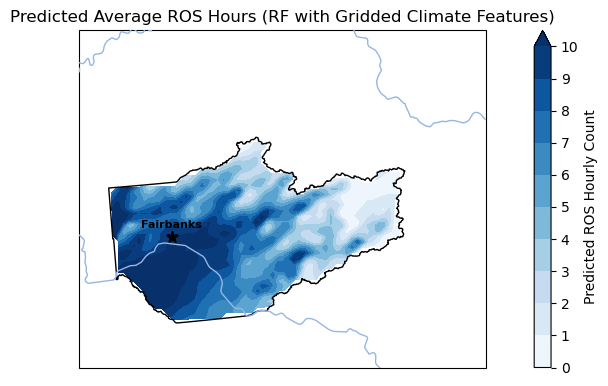

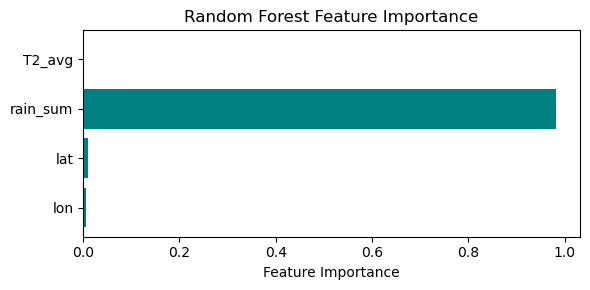

In [51]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# --- Compute mean values across seasons ---
rain_sum_mean = np.nanmean(rain_sum, axis=0)  # shape: (lat, lon)
T2_avg_mean = np.nanmean(data['T2_avg'], axis=0)      # shape: (lat, lon)
average_ROS_tally = np.nanmean(data['ros_counts'], axis=0)

# --- Flatten all variables ---
lon_flat = np.ravel(lon)
lat_flat = np.ravel(lat)
ros_hours_flat = np.ravel(average_ROS_tally)
rain_sum_flat = np.ravel(rain_sum_mean)
T2_avg_flat = np.ravel(T2_avg_mean)

# --- Apply NaN mask (valid pixels only) ---
mask = ~np.isnan(ros_hours_flat) & ~np.isnan(rain_sum_flat) & ~np.isnan(T2_avg_flat)
lon_flat = lon_flat[mask]
lat_flat = lat_flat[mask]
ros_hours_flat = ros_hours_flat[mask]
rain_sum_flat = rain_sum_flat[mask]
T2_avg_flat = T2_avg_flat[mask]

# --- Convert T2 from K to C ---
T2_avg_flat = T2_avg_flat - 273.15

# --- Build training DataFrame ---
df = pd.DataFrame({
    'lon': lon_flat,
    'lat': lat_flat,
    'rain_sum': rain_sum_flat,
    'T2_avg': T2_avg_flat,
    'ros_hours': ros_hours_flat
})

# --- Train Random Forest model ---
features = ['lon', 'lat', 'rain_sum', 'T2_avg']
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(df[features], df['ros_hours'])

# --- Predict and reshape back to grid ---
y_pred = model.predict(df[features])
predicted_grid = np.full(average_ROS_tally.shape, np.nan)
predicted_grid.flat[mask] = y_pred

# --- Plot prediction map ---
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,
                                       standard_parallels=(55, 65))
}
levels = np.arange(0, 11, 1)
fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))

cf = ax.contourf(lon, lat, predicted_grid, levels=levels, extend='max',
                 cmap='Blues', transform=ccrs.PlateCarree())

cbar = fig.colorbar(cf, ax=ax, label='Predicted ROS Hourly Count')
cbar.set_ticks(levels)
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',
                   linewidth=1, zorder=2, transform=ccrs.PlateCarree())

ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k',
           zorder=5, s=75, label='Fairbanks', transform=ccrs.PlateCarree())

ax.text(Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=6, fontweight='bold', color='black')

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title("Predicted Average ROS Hours (RF with Gridded Climate Features)")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

# --- Feature Importance ---
importances = model.feature_importances_
plt.figure(figsize=(6, 3))
plt.barh(features, importances, color='teal')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


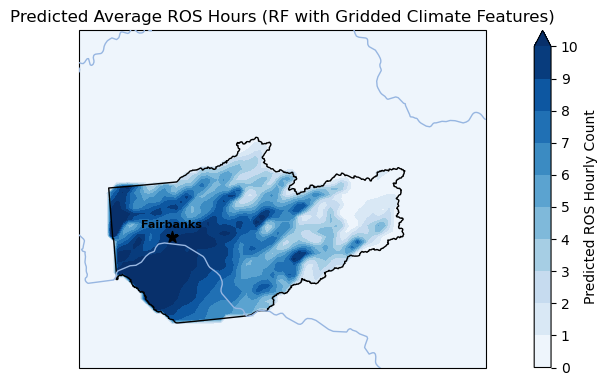

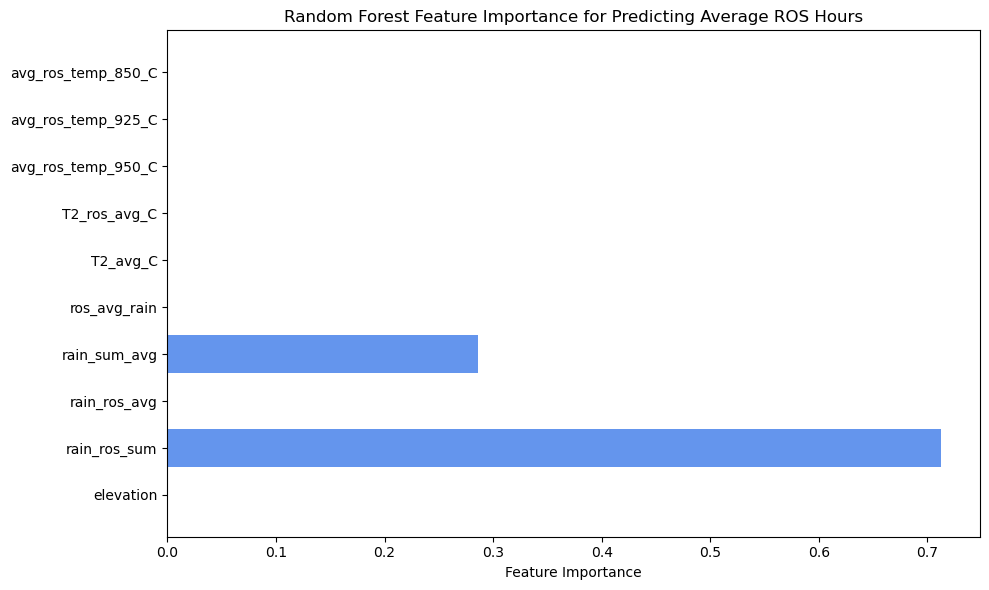

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Flatten and mask data to handle missing values consistently
mask = ~np.isnan(np.ravel(average_ROS_tally))

# Flatten all arrays and apply mask
df = pd.DataFrame({
    'avg_ros_temp_850_C': np.ravel(avg_ros_temp_850_C)[mask],
    'avg_ros_temp_925_C': np.ravel(avg_ros_temp_925_C)[mask],
    'avg_ros_temp_950_C': np.ravel(avg_ros_temp_950_C)[mask],
    'T2_ros_avg_C': np.ravel(np.mean(data['T2_ros_avg'],axis=0))[mask],
    'T2_avg_C': np.ravel((T2_avg - 273.15))[mask],
    'ros_avg_rain': np.ravel(ros_avg_rain)[mask],
    'rain_sum_avg': np.ravel(rain_sum_avg)[mask],
    'rain_ros_avg': np.ravel(rain_ros_avg)[mask],
    'rain_ros_sum': np.ravel(rain_ros_sum)[mask],
    'average_ROS_tally': np.ravel(average_ROS_tally)[mask],
    'elevation':np.ravel(elevation)[mask]
})

# Define features and target
features = df.columns.drop('average_ROS_tally')
X = df[features]
y = df['average_ROS_tally']

# Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X, y)

# Predict (optional, just to see range)
y_pred = model.predict(X)
#print("Prediction range:", y_pred.min(), y_pred.max())
y_pred = model.predict(df[features])
predicted_grid = np.full(average_ROS_tally.shape, np.nan)
predicted_grid.flat[mask] = y_pred


# --- Plot prediction map ---
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,
                                       standard_parallels=(55, 65))
}
levels = np.arange(0, 11, 1)
fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))

cf = ax.contourf(lon, lat, predicted_grid, levels=levels, extend='max',
                 cmap='Blues', transform=ccrs.PlateCarree())

cbar = fig.colorbar(cf, ax=ax, label='Predicted ROS Hourly Count')
cbar.set_ticks(levels)
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',
                   linewidth=1, zorder=2, transform=ccrs.PlateCarree())

ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k',
           zorder=5, s=75, label='Fairbanks', transform=ccrs.PlateCarree())

ax.text(Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=6, fontweight='bold', color='black')

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title("Predicted Average ROS Hours (RF with Gridded Climate Features)")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

# Feature importances
importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(features, importances, color='cornflowerblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance for Predicting Average ROS Hours')
plt.gca().invert_yaxis()  # Highest importance on top
plt.tight_layout()
plt.show()


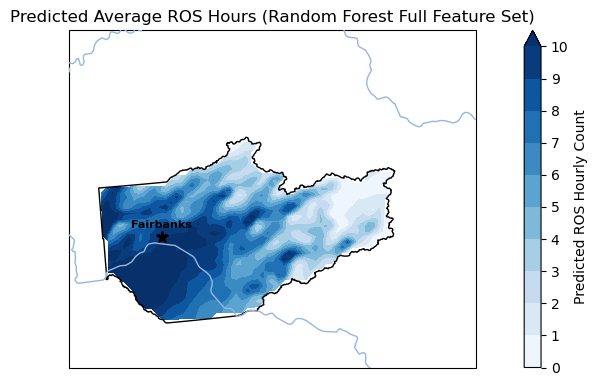

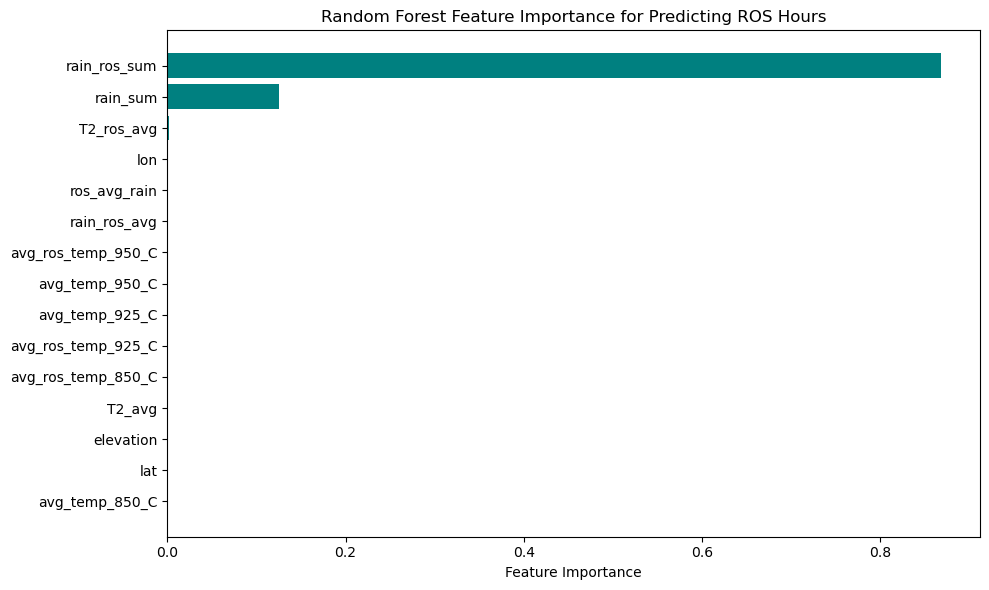

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ---- Convert all needed variables to flat arrays and clean NaNs ----
# Compute means over seasons if not already done
avg_dict = {
    'ros_hours': np.ravel(average_ROS_tally),
    'rain_sum': np.ravel(rain_sum_avg),
    'rain_ros_avg': np.ravel(rain_ros_avg),
    'rain_ros_sum': np.ravel(rain_ros_sum),
    'ros_avg_rain': np.ravel(ros_avg_rain),
    'T2_avg': np.ravel(T2_avg),
    'T2_ros_avg': np.ravel(T2_ros_avg),
    'avg_temp_850_C': np.ravel(avg_temp_850_C),
    'avg_temp_925_C': np.ravel(avg_temp_925_C),
    'avg_temp_950_C': np.ravel(avg_temp_950_C),
    'avg_ros_temp_850_C': np.ravel(avg_ros_temp_850_C),
    'avg_ros_temp_925_C': np.ravel(avg_ros_temp_925_C),
    'avg_ros_temp_950_C': np.ravel(avg_ros_temp_950_C),
    'lon': np.ravel(lon),
    'lat': np.ravel(lat),
    'elevation':np.ravel(elevation)
}

# ---- Apply shared NaN mask across all variables ----
# Create a combined mask to exclude any pixels with NaNs
combined_mask = np.ones_like(avg_dict['ros_hours'], dtype=bool)
for val in avg_dict.values():
    combined_mask &= ~np.isnan(val)

# Apply mask to all variables
for key in avg_dict:
    avg_dict[key] = avg_dict[key][combined_mask]

# ---- Create DataFrame for training ----
df = pd.DataFrame(avg_dict)

# ---- Define features and target ----
target = 'ros_hours'
features = df.columns.drop(target)

# ---- Train Random Forest Model ----
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(df[features], df[target])

# ---- Predict ROS and reshape to grid ----
y_pred = model.predict(df[features])

# Recreate prediction grid
predicted_grid = np.full(average_ROS_tally.shape, np.nan)
predicted_grid.flat[combined_mask] = y_pred

# ---- Plot prediction map ----
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,
                                       standard_parallels=(55, 65))
}
levels = np.arange(0, 11, 1)
fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))

cf = ax.contourf(lon, lat, predicted_grid, levels=levels, extend='max',
                 cmap='Blues', transform=ccrs.PlateCarree())

cbar = fig.colorbar(cf, ax=ax, label='Predicted ROS Hourly Count')
cbar.set_ticks(levels)
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',
                   linewidth=1, zorder=2, transform=ccrs.PlateCarree())

ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k',
           zorder=5, s=75, label='Fairbanks', transform=ccrs.PlateCarree())
ax.text(Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=6, fontweight='bold', color='black')

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title("Predicted Average ROS Hours (Random Forest Full Feature Set)")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

importances = model.feature_importances_

# Sort by importance
sorted_idx = np.argsort(importances)[::-1]
sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='teal')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance for Predicting ROS Hours')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


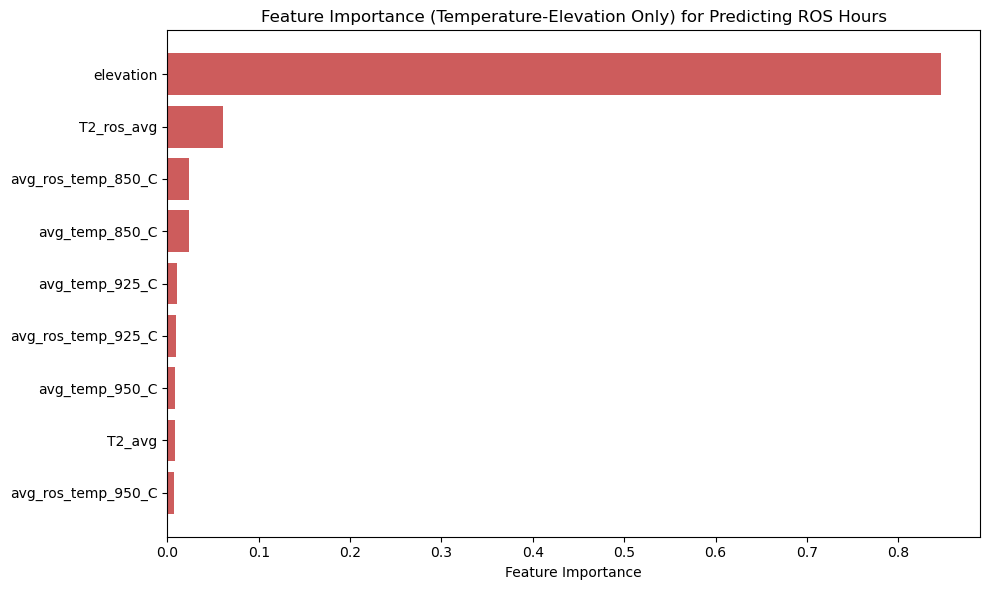

TypeError: Input z must be 2D, not 1D

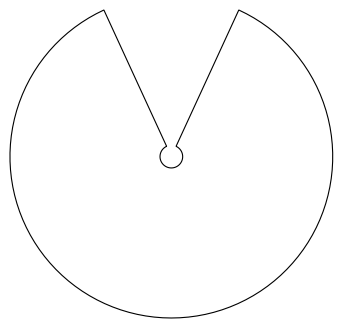

In [66]:
temp_features = [
    'T2_avg',             # Surface air temp (all winter)
    'T2_ros_avg',         # Surface air temp (ROS only)
    'avg_temp_850_C',     # 850mb winter
    'avg_temp_925_C',
    'avg_temp_950_C',
    'avg_ros_temp_850_C', # 850mb ROS only
    'avg_ros_temp_925_C',
    'avg_ros_temp_950_C',
    'elevation'
]

model_temp = RandomForestRegressor(n_estimators=200, random_state=42)
y_pred=model_temp.fit(df[temp_features], df['ros_hours'])

importances_temp = model_temp.feature_importances_

sorted_idx = np.argsort(importances_temp)[::-1]
sorted_features_temp = np.array(temp_features)[sorted_idx]
sorted_importances_temp = importances_temp[sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features_temp, sorted_importances_temp, color='indianred')
plt.xlabel('Feature Importance')
plt.title('Feature Importance (Temperature-Elevation Only) for Predicting ROS Hours')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#from sklearn.metrics import r2_score, mean_squared_error

#y_true = df['ros_hours']
#y_pred = model_temp.predict(df[temp_features])
#print("R²:", r2_score(y_true, y_pred))
#print("RMSE:", mean_squared_error(y_true, y_pred, squared=False))


AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,
                                       standard_parallels=(55, 65))
}

levels = np.arange(0, 11, 1)  # Adjust levels as needed

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))

cf = ax.contourf(lon, lat, y_pred, levels=levels, extend='max',
                 cmap='Blues', transform=ccrs.PlateCarree())

cbar = fig.colorbar(cf, ax=ax, label='Predicted ROS Hourly Count (Temp + Elevation)')
cbar.set_ticks(levels)
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

# Add your boundary and points - replace these with your actual data
FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',
                   linewidth=1, zorder=2, transform=ccrs.PlateCarree())

ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k',
           zorder=5, s=75, label='Fairbanks', transform=ccrs.PlateCarree())

ax.text(Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=6, fontweight='bold', color='black')

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title("Predicted Average ROS Hours\n(Random Forest Temp + Elevation Model)")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


In [62]:
# Can we predict ROS hours using temperature-only model 
y_pred_temp = model_temp.predict(df[temp_features])

predicted_grid_temp = np.full(average_ROS_tally.shape, np.nan)
predicted_grid_temp.flat[mask] = y_pred_temp


AK_ALBERS_SUBPLOT_KW = { 'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50, standard_parallels=(55, 65))}

fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))
levels = np.arange(0, 11, 1)
cf = ax.contourf(lon, lat, predicted_grid_temp, levels=levels, extend='max', cmap='Blues', transform=ccrs.PlateCarree())
#Blues
#YlOrRd

# Colorbar
cbar = fig.colorbar(cf, ax=ax, label='Predicted ROS Hourly Count (Temp Only)')
cbar.set_ticks(levels)
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

# Overlay features
FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, zorder=2, transform=ccrs.PlateCarree())

ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='black', zorder=5, s=75, label='Fairbanks', transform=ccrs.PlateCarree())

ax.text(Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=6, fontweight='bold', color='black')

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)
ax.set_extent(FNSB_boundary.total_bounds, crs=ccrs.PlateCarree())

ax.set_title("Predicted Average ROS Hours\n(Temperature-Only Random Forest Model)")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()


IndexError: unsupported iterator index

In [63]:
#compare these two models 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

avg_dict = {
    'ros_hours': np.ravel(average_ROS_tally),
    'rain_sum': np.ravel(rain_sum_avg),
    'rain_ros_avg': np.ravel(rain_ros_avg),
    'rain_ros_sum': np.ravel(rain_ros_sum),
    'ros_avg_rain': np.ravel(ros_avg_rain),
    'T2_avg': np.ravel(T2_avg),
    'T2_ros_avg': np.ravel(T2_ros_avg),
    'avg_temp_850_C': np.ravel(avg_temp_850_C),
    'avg_temp_925_C': np.ravel(avg_temp_925_C),
    'avg_temp_950_C': np.ravel(avg_temp_950_C),
    'avg_ros_temp_850_C': np.ravel(avg_ros_temp_850_C),
    'avg_ros_temp_925_C': np.ravel(avg_ros_temp_925_C),
    'avg_ros_temp_950_C': np.ravel(avg_ros_temp_950_C),
    'lon': np.ravel(lon),
    'lat': np.ravel(lat),
    'elevation':np.ravel(elevation)
}

y_true = df['ros_hours']
y_pred_full = model.predict(df[features])  # 'features' includes temp + rain

r2_full = r2_score(y_true, y_pred_full)
mae_full = mean_absolute_error(y_true, y_pred_full)
rmse_full = np.sqrt(mean_squared_error(y_true, y_pred_full))

# --- Temp-only model metrics ---
y_pred_temp = model_temp.predict(df[temp_features])

r2_temp = r2_score(y_true, y_pred_temp)
mae_temp = mean_absolute_error(y_true, y_pred_temp)
rmse_temp = np.sqrt(mean_squared_error(y_true, y_pred_temp))

# --- Print comparison ---
print("=== Random Forest Model Performance ===")
print(f"Full Model (Temp + Rain):")
print(f"  R²:   {r2_full:.3f}")
print(f"  MAE:  {mae_full:.3f}")
print(f"  RMSE: {rmse_full:.3f}")
print()
print(f"Temperature-Elevation Only Model:")
print(f"  R²:   {r2_temp:.3f}")
print(f"  MAE:  {mae_temp:.3f}")
print(f"  RMSE: {rmse_temp:.3f}")


=== Random Forest Model Performance ===
Full Model (Temp + Rain):
  R²:   1.000
  MAE:  0.048
  RMSE: 0.071

Temperature-Elevation Only Model:
  R²:   0.992
  MAE:  0.186
  RMSE: 0.297


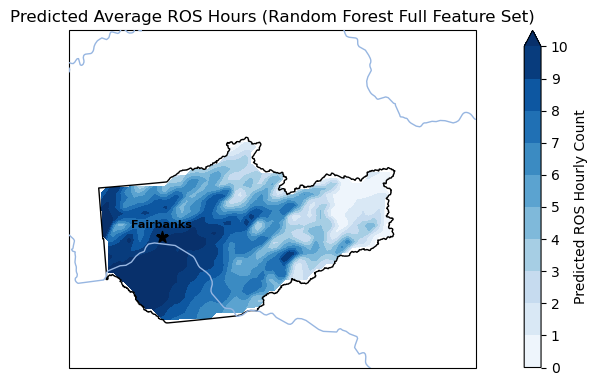

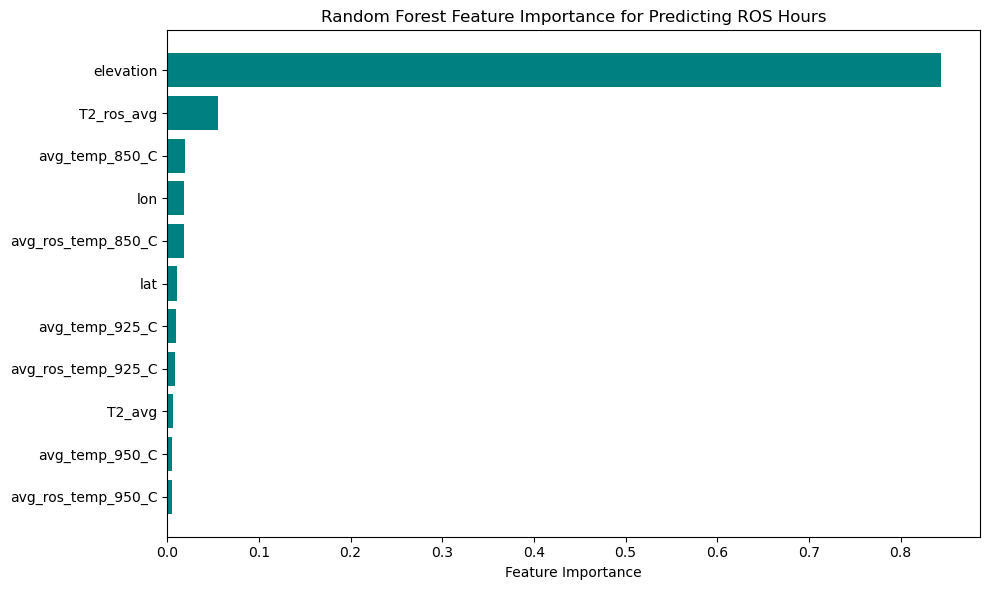

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ---- Convert all needed variables to flat arrays and clean NaNs ----
# Compute means over seasons if not already done
avg_dict = {
    'ros_hours': np.ravel(average_ROS_tally),
    'T2_avg': np.ravel(T2_avg),
    'T2_ros_avg': np.ravel(T2_ros_avg),
    'avg_temp_850_C': np.ravel(avg_temp_850_C),
    'avg_temp_925_C': np.ravel(avg_temp_925_C),
    'avg_temp_950_C': np.ravel(avg_temp_950_C),
    'avg_ros_temp_850_C': np.ravel(avg_ros_temp_850_C),
    'avg_ros_temp_925_C': np.ravel(avg_ros_temp_925_C),
    'avg_ros_temp_950_C': np.ravel(avg_ros_temp_950_C),
    'lon': np.ravel(lon),
    'lat': np.ravel(lat),
    'elevation':np.ravel(elevation)
}

# ---- Apply shared NaN mask across all variables ----
# Create a combined mask to exclude any pixels with NaNs
combined_mask = np.ones_like(avg_dict['ros_hours'], dtype=bool)
for val in avg_dict.values():
    combined_mask &= ~np.isnan(val)

# Apply mask to all variables
for key in avg_dict:
    avg_dict[key] = avg_dict[key][combined_mask]

# ---- Create DataFrame for training ----
df = pd.DataFrame(avg_dict)

# ---- Define features and target ----
target = 'ros_hours'
features = df.columns.drop(target)

# ---- Train Random Forest Model ----
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(df[features], df[target])

# ---- Predict ROS and reshape to grid ----
y_pred = model.predict(df[features])

# Recreate prediction grid
predicted_grid = np.full(average_ROS_tally.shape, np.nan)
predicted_grid.flat[combined_mask] = y_pred

# ---- Plot prediction map ----
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,
                                       standard_parallels=(55, 65))
}
levels = np.arange(0, 11, 1)
fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))

cf = ax.contourf(lon, lat, predicted_grid, levels=levels, extend='max',
                 cmap='Blues', transform=ccrs.PlateCarree())

cbar = fig.colorbar(cf, ax=ax, label='Predicted ROS Hourly Count')
cbar.set_ticks(levels)
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',
                   linewidth=1, zorder=2, transform=ccrs.PlateCarree())

ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k',
           zorder=5, s=75, label='Fairbanks', transform=ccrs.PlateCarree())
ax.text(Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=6, fontweight='bold', color='black')

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title("Predicted Average ROS Hours (Random Forest Full Feature Set)")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

importances = model.feature_importances_

# Sort by importance
sorted_idx = np.argsort(importances)[::-1]
sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='teal')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance for Predicting ROS Hours')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

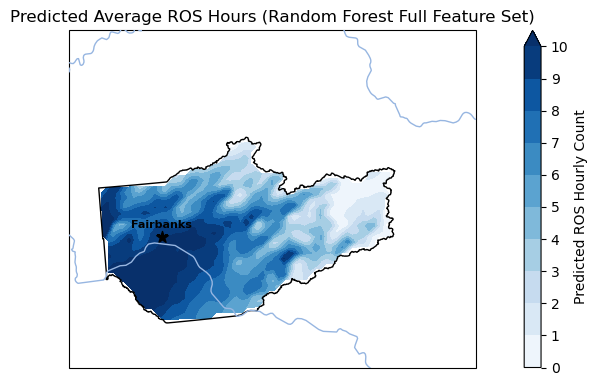

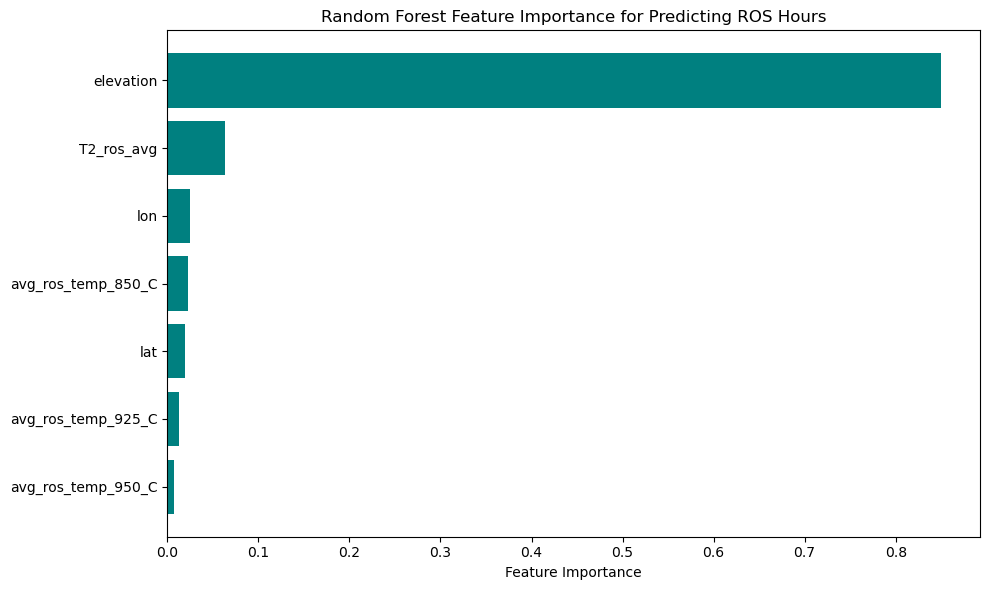

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# ---- Convert all needed variables to flat arrays and clean NaNs ----
# Compute means over seasons if not already done
avg_dict = {
    'ros_hours': np.ravel(average_ROS_tally),
    #'T2_avg': np.ravel(T2_avg),
    'T2_ros_avg': np.ravel(T2_ros_avg),
    #'avg_temp_850_C': np.ravel(avg_temp_850_C),
    #'avg_temp_925_C': np.ravel(avg_temp_925_C),
    #'avg_temp_950_C': np.ravel(avg_temp_950_C),
    'avg_ros_temp_850_C': np.ravel(avg_ros_temp_850_C),
    'avg_ros_temp_925_C': np.ravel(avg_ros_temp_925_C),
    'avg_ros_temp_950_C': np.ravel(avg_ros_temp_950_C),
    'lon': np.ravel(lon),
    'lat': np.ravel(lat),
    'elevation':np.ravel(elevation)
}

# ---- Apply shared NaN mask across all variables ----
# Create a combined mask to exclude any pixels with NaNs
combined_mask = np.ones_like(avg_dict['ros_hours'], dtype=bool)
for val in avg_dict.values():
    combined_mask &= ~np.isnan(val)

# Apply mask to all variables
for key in avg_dict:
    avg_dict[key] = avg_dict[key][combined_mask]

# ---- Create DataFrame for training ----
df = pd.DataFrame(avg_dict)

# ---- Define features and target ----
target = 'ros_hours'
features = df.columns.drop(target)

# ---- Train Random Forest Model ----
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(df[features], df[target])

# ---- Predict ROS and reshape to grid ----
y_pred = model.predict(df[features])

# Recreate prediction grid
predicted_grid = np.full(average_ROS_tally.shape, np.nan)
predicted_grid.flat[combined_mask] = y_pred

# ---- Plot prediction map ----
AK_ALBERS_SUBPLOT_KW = {
    'projection': ccrs.AlbersEqualArea(central_longitude=-154, central_latitude=50,
                                       standard_parallels=(55, 65))
}
levels = np.arange(0, 11, 1)
fig, ax = plt.subplots(subplot_kw=AK_ALBERS_SUBPLOT_KW, figsize=(10, 4))

cf = ax.contourf(lon, lat, predicted_grid, levels=levels, extend='max',
                 cmap='Blues', transform=ccrs.PlateCarree())

cbar = fig.colorbar(cf, ax=ax, label='Predicted ROS Hourly Count')
cbar.set_ticks(levels)
cbar.ax.set_position([0.77, 0.1, 0.02, 0.8])

FNSB_boundary.plot(ax=ax, facecolor='none', edgecolor='black',
                   linewidth=1, zorder=2, transform=ccrs.PlateCarree())

ax.scatter(Fairbanks_lon, Fairbanks_lat, marker='*', color='k',
           zorder=5, s=75, label='Fairbanks', transform=ccrs.PlateCarree())
ax.text(Fairbanks_lon, Fairbanks_lat + 0.05, 'Fairbanks',
        transform=ccrs.PlateCarree(), ha='center', va='bottom',
        fontsize=8, zorder=6, fontweight='bold', color='black')

ax.add_feature(cfeature.BORDERS, zorder=9)
ax.add_feature(cfeature.COASTLINE, zorder=9)
ax.add_feature(cfeature.RIVERS, zorder=9)

ax.set_title("Predicted Average ROS Hours (Random Forest Full Feature Set)")
ax.set_extent([-149, -143, 64, 66], crs=ccrs.PlateCarree())
ax.set_aspect('equal')
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

importances = model.feature_importances_

# Sort by importance
sorted_idx = np.argsort(importances)[::-1]
sorted_features = features[sorted_idx]
sorted_importances = importances[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='teal')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance for Predicting ROS Hours')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()